In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.feature_selection import SelectFromModel
from collections import Counter
from tinydb import TinyDB, where
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm


In [40]:
from sklearn.linear_model import SGDClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Pretraitement des données 

In [42]:
data = pd.read_csv("C:/Users/khaou/OneDrive/Bureau/data Mining/ProjetFindannee/bank.csv",sep=";")

In [43]:
data.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [44]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [45]:
data = MultiColumnLabelEncoder(columns = ['job','marital','education', 'default','housing','loan','contact','month','duration','campaign','pdays','previous','poutcome','y']).fit_transform(data)

In [46]:
X=data[["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"]]

In [47]:
y=data["y"]

In [48]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,75,0,0,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,216,0,228,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,181,0,219,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,195,3,0,0,3
4,59,1,1,1,0,0,1,0,2,5,8,222,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,325,4,0,0,3
4517,57,6,1,2,1,-3313,1,1,2,9,8,149,0,0,0,3
4518,57,9,1,1,0,295,0,0,0,19,1,147,10,0,0,3
4519,28,1,1,1,0,1137,0,0,0,6,3,125,3,140,3,1


In [49]:
m=Counter(y)

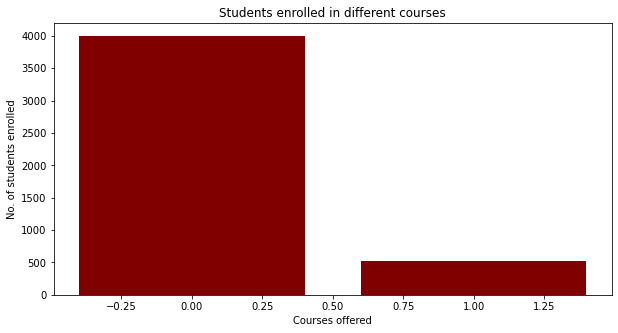

In [50]:
courses = list(m.keys())
values = list(m.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon')
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

In [51]:
# transform the dataset
oversample = SMOTE()
X_o, y_o = oversample.fit_resample(X, y)
# summarize the new class distribution
m_o=counter = Counter(y_o)
print(m_o)



Counter({0: 4000, 1: 4000})


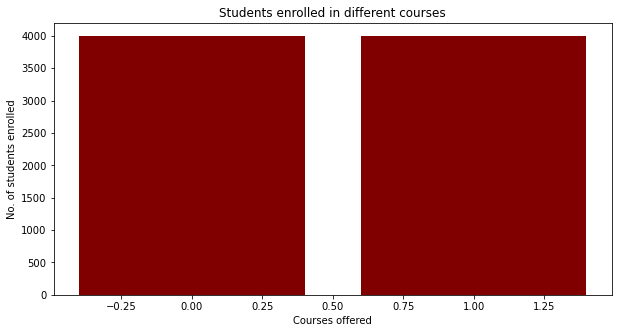

In [52]:
courses_o = list(m_o.keys())
values_o = list(m_o.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses_o, values_o, color ='maroon')
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

# Selection des variables explicatives 

In [53]:
selector=VarianceThreshold(threshold=0.2)
selector.fit_transform(X)
selector.get_support()
np.array(X.columns)[selector.get_support()]
np.array(X.columns)[selector.get_support()]

array(['age', 'job', 'marital', 'education', 'balance', 'housing',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'], dtype=object)

In [54]:
X=X[['age', 'job', 'marital', 'education', 'balance', 'housing',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]

In [55]:
selector=VarianceThreshold(threshold=0.2)
selector.fit_transform(X_o)
selector.get_support()
np.array(X_o.columns)[selector.get_support()]


array(['age', 'job', 'marital', 'education', 'balance', 'housing',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'], dtype=object)

In [56]:
X_o=X_o[['age', 'job', 'marital', 'education', 'balance', 'housing',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]

# Modelisation

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [58]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, test_size=0.3, random_state=0)

# Regression logistique 

In [59]:
from sklearn.linear_model import LogisticRegression
#Initalize the classifier
clf = LogisticRegression(random_state=0)
#Fitting the training data
clf.fit(X_train, y_train)
#Predicting on test
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1159   31]
 [ 141   26]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1190
           1       0.46      0.16      0.23       167

    accuracy                           0.87      1357
   macro avg       0.67      0.56      0.58      1357
weighted avg       0.84      0.87      0.84      1357



C:\Users\khaou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
clf_o = LogisticRegression(random_state=0)
#Fitting the training data
clf_o.fit(X_train_o, y_train_o)
#Predicting on test
y_pred_o=clf_o.predict(X_test_o)
print(confusion_matrix(y_test_o, y_pred_o))
print(classification_report(y_test_o, y_pred_o))

[[957 235]
 [281 927]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1192
           1       0.80      0.77      0.78      1208

    accuracy                           0.79      2400
   macro avg       0.79      0.79      0.78      2400
weighted avg       0.79      0.79      0.78      2400



C:\Users\khaou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM

In [61]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8592483419307295
Precision: 0.35365853658536583
Recall: 0.17365269461077845


In [62]:
#Create a svm Classifier
clf_o = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_o.fit(X_train_o, y_train_o)

#Predict the response for test dataset
y_pred_o = clf_o.predict(X_test_o)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_o, y_pred_o))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_o, y_pred_o))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_o, y_pred_o))

Accuracy: 0.8404166666666667
Precision: 0.831858407079646
Recall: 0.8559602649006622


#  Arbre de decision

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth = 5)
#tree_model = tree.DecisionTreeClassifier(max_depth = 2)
tree_model=tree_model.fit(X_train, y_train)
y_train.value_counts()
Y_predict=tree_model.predict(X_test)
# Plot the Confusion Matrix :
from sklearn.metrics import accuracy_score, confusion_matrix 
mat = confusion_matrix(Y_predict, y_test)
print(mat)
#plt.figure(figsize=(15,5))
sns.heatmap(mat, annot=True)
plt.xlabel('Test')
plt.ylabel('Predicted')

# Accuracy:
a_CART = accuracy_score(y_test,Y_predict)
print("L'accuracy score du modèle CART est de : ",a_CART)

[[1143  106]
 [  47   61]]


In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth = 5)
#tree_model = tree.DecisionTreeClassifier(max_depth = 2)
tree_model=tree_model.fit(X_train_o, y_train_o)
y_train_o.value_counts()
Y_predict_o=tree_model.predict(X_test_o)
# Plot the Confusion Matrix :
from sklearn.metrics import accuracy_score, confusion_matrix 
mat_o = confusion_matrix(Y_predict_o, y_test_o)
print(mat_o)
#plt.figure(figsize=(15,5))
sns.heatmap(mat_o, annot=True)
plt.xlabel('Test')
plt.ylabel('Predicted')

# Accuracy:
a_CART_o = accuracy_score(y_test_o,Y_predict_o)
print("L'accuracy score du modèle CART est de : ",a_CART_o)

# Random Forest

In [ ]:
Rf_model = RandomForestClassifier()
Rf_model=Rf_model.fit(X_train, y_train)
Y_predict=Rf_model.predict(X_test)
a_CART = accuracy_score(y_test,Y_predict)
print("L'accuracy score du modèle RF est de : ",a_CART)
mat = confusion_matrix(Y_predict, y_test)
sns.heatmap(mat, annot=True,  xticklabels=names, yticklabels=names)
plt.xlabel('Test')
plt.ylabel('Predicted')

In [ ]:
Rf_model = RandomForestClassifier()
Rf_model=Rf_model.fit(X_train_o, y_train_o)
Y_predict_=Rf_model.predict(X_test)
a_CART_o = accuracy_score(y_test_o,Y_predict_o)
print("L'accuracy score du modèle RF est de : ",a_CART)
mat = confusion_matrix(Y_predict_o, y_test_o)
sns.heatmap(mat, annot=True)
plt.xlabel('Test')
plt.ylabel('Predicted')